<a href="https://colab.research.google.com/github/Caterpillar-T/MAT-421/blob/main/Homework_5_MAT_421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 5 MAT 421

Kyle Tucker

**1.1 Introduction**

Linear algebra is a widely used field of mathematics. And plays a large role in data science, machine learning, and is a key component to solving data science problems. The things that were tedious by hand in linear algebra such as  matrix decomposition, orthogonality, and eigenvalues can be performed quickly and accurately and program and are also how many systems run.

**1.2.1 Elements of Linear Algebra: Linear Combinations**

Linear combinations come about by multiplying your vectors by a constant and then adding them to get your final result. The result being called a linear subspace.

This notion of linear subspace can be defined as for all $u_1,u_2 \in U$ and $\alpha \in \mathbb{R}$, $u_1+u_2 \in U$ and $\alpha u_1 \in U$ where $U \subseteq V$

Another linear subspace we observe is the Span. This is the set of all linear combinations.

Span can be defined as $span(w_1,...,w_m) = \{∑_{j=1}^{m} \alpha_j w_j: \alpha_1,...,\alpha_m \in \mathbb{R}\}$.

**1.2.2 Orthogonality**

Orthonormal bases are used to simplify mathmetical representations, which additionally can reveal insights in regard to the underlying problem being worked on.

The Norm and Inner Product, expressed as $<u,v> = u * v = ∑_{j}^{n}u_iv_i$ and $||u|| = \sqrt{∑_{1}^{n}u_{i}^{2}}$, are an example of one such tools.

In the most straight forward definition orthonormal-ity is defined as for all $i$ and all $j \not= i$, $<u_i,u_j> =0$, and $||u_i|| = 1$.

And lastly we see Orthonormal Basis Expansion, which is expressed as $u = ∑_{j=1}^{m}<u,q_j>q_j$. This allows us to construct a unique and simple representation of a vector.

**1.2.3 Gram-Schmidt Process**

One way of obtaining orthonormal basis is through use of The Gram-Schmidt algorithm. This is formally defined as:

Let $a_1,...,a_m \in R^n$ be linearly independent, then there exists an orthonormal basis $q_1,...,q_{i-1}$ of $span(a_1,...,a_m)$.

From definition we see that we continue to add vectors after using ridding ourselves of the previously used orthogonal projection.

**1.2.4 Eigenvalues and Eigenvectors**

Formally, eigenvalues and eigenvectors are defined as follows:

Let $A \in \mathbb{R}^{d × d}$ be a square matrix. Then $λ \in \mathbb{R}$ is an eigenvalue of $A$ if there exists a nonzero vector $x \not= 0$ such that $Ax=λx$. And $x$ is referred to as the eigenvector.

While daunting to calculate by hand, Python is a powerful tool for solving such things.

In [4]:
import numpy as np
from numpy.linalg import eig
a=np.array([[1,2,3],[1,6,7],[2,9,4]])
u,v=eig(a)
print('Eigenvalue:', u)
print('Eigenvector:', v)

Eigenvalue: [13.57385977  0.64153502 -3.21539479]
Eigenvector: [[-0.27126924 -0.97249389 -0.28790787]
 [-0.67235991  0.22995462 -0.5592621 ]
 [-0.6887272  -0.03710141  0.77738984]]


**1.3 Linear Regression**

Linear regression is a frequently used tool at our disposal. The models depend linearly on their unknown parameters and therefore are easy to fit. QR decomposition is used to solve the linear least squares problem. All we need is to first use teh Gram-Schmidt algorithm for an orthonormal basis and calculate $A=QR$. A breeze with Python of course.

In [5]:
import numpy as np
from numpy.linalg import qr
a=np.array([[1,2,3],[1,6,7],[2,9,4]])
p=[3,4,8,14]
for i in range(14):
  q,r=qr(a)
  a=np.dot(r,q)
  if i+1 in p:
    print(f'Iteration {i+1}:')
    print(a)

Iteration 3:
[[13.54787042 -1.93014273  1.68080871]
 [-0.25399094 -3.16631939 -0.14353358]
 [-0.03486334 -0.64050904  0.61844897]]
Iteration 4:
[[ 1.35785732e+01 -1.24352196e+00 -2.00168294e+00]
 [ 6.11909070e-02 -3.19873185e+00 -6.58344883e-01]
 [ 1.62768451e-03 -1.24986758e-01  6.20158662e-01]]
Iteration 8:
[[ 1.35738755e+01 -1.36892711e+00 -1.96179300e+00]
 [ 1.92466907e-04 -3.21538320e+00 -5.26393586e-01]
 [ 8.15960104e-09 -1.99907851e-04  6.41507737e-01]]
Iteration 14:
[[ 1.35738598e+01 -1.36922121e+00 -1.96172808e+00]
 [ 3.40048115e-08 -3.21539479e+00 -5.26171206e-01]
 [ 9.09439165e-17 -1.26110527e-08  6.41535019e-01]]


The least squares problems can be solved in a similar fashion. Using least squares regression. This allows us to find the estimation function with the least total squared error. In other words, a means of optimization.

In [6]:
import numpy as np
from scipy import optimize
x=np.linspace(1,24,39)
y=1+x+x*np.random.random(len(x))
A=np.vstack([x,np.ones(len(x))]).T
y=y[:,np.newaxis]
a=np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(a)

[[1.40696583]
 [1.96569067]]


Graphing this is a good visual guide to see how well our optimization is. The straight line through the center of where all are points are scattered is ideal.

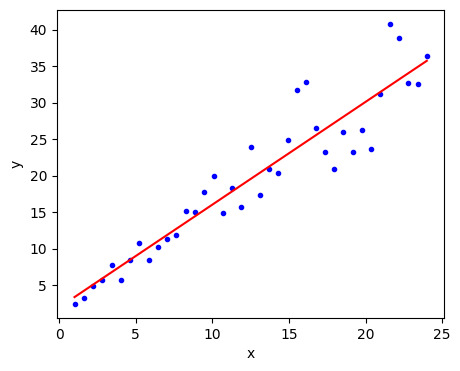

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(x, y, 'b.')
plt.plot(x, a[0]*x + a[1], 'r')
plt.xlabel('x'); plt.ylabel('y')
plt.show()